## Computing Fundamental Transition of CO under different levels of approximation
We will illustrate approximations to the vibrational transition energies, specifically the fundamental transition, using the diatomic molecule CO.  
We will use the Morse potential as a model for the "exact" interatomic potential, and we will approximate this potential by different orders of a Taylor expansion, including quadratic (Harmonic approximation), cubic, and quartic terms.  The Harmonic and Morse potentials are exactly solvable, and the eigenfunctions and eigenvalues of the vibrational Hamiltonian with cubic and quartic potentials can be approximated using perturbation theory.  We will
compare the fundamental ($n=0 \rightarrow n=1$) transition computed exactly for Harmonic and Morse potentials, and approximately at 2nd order of perturbation theory for cubic and quartic potentials to see the impact of various levels of potential truncation and approximation.

The vibrational Hamiltonian within the Morse model for ${\rm CO}$ can be written as 
Within the Morse model, the interatomic potential can be written as
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{Morse}(r) \tag{1}
\end{equation}
where 
\begin{equation}
V_{Morse}(r) = D_e \left(1 - e^{-\beta(r-r_{eq})} \right)^2 \tag{2}
\end{equation}
with $D_e = 11.225 \: {\rm eV}$, $r_{eq} = 1.1283 \: {\rm Ang.}$, $\beta = 2.5944 \: {\rm Ang.}^{-1}$,
and $\mu = 6.8606 \: {\rm amu}$ for the ${\rm CO}$ molecule.

The exact energy eigenvalues for Equation (1) can be written as 
\begin{equation}
E_n = \hbar \omega \left( \left(n+ \frac{1}{2} \right) - \chi_e \left(n+ \frac{1}{2} \right)^2 \right) \tag{3}
\end{equation}
where
\begin{equation}
\omega = \sqrt{\frac{2D_e \beta^2}{\mu}} \tag{4}
\end{equation}
and 
\begin{equation}
\chi_e = \frac{\hbar \omega}{4 D_e}. \tag{5}
\end{equation}

The Morse potential can be approximated by a Taylor expansion as follows:
\begin{equation}
V_T(r) = \sum_{n=0}^{\infty} \frac{ f^{(n)}(r_{eq})}{n!} \left(r-r_{eq} \right)^n, \tag{6}
\end{equation}
where $f^{(n)}(r_{eq})$ is the $n^{th}$-order derivative of the Morse potential evaluated at the equilibrium bondlength, e.g. $f^{(1)}(r_{eq}) = \frac{d}{dr}V_{Morse}(r_{eq}).$

We will define the Harmonic approximation to the potential as 
\begin{equation}
V_H(r) =  \frac{ f^{''}(r_{eq})}{2} \left(r-r_{eq} \right)^2 = \frac{1}{2} k \left(r-r_{eq} \right)^2 \tag{7}
\end{equation}
the cubic approximation to the potential as 
\begin{equation}
V_C(r) =  V_H(r) + \frac{ f^{'''}(r_{eq})}{6} \left(r-r_{eq} \right)^3 = V_H(r) + \frac{1}{6} g \left(r-r_{eq} \right)^3,   \tag{8}
\end{equation}
and the quartic approximation as
\begin{equation}
V_Q(r) =  V_C(r) + \frac{ f^{''''}(r_{eq})}{24} \left(r-r_{eq} \right)^4 =  V_C(r) + \frac{1}{24}h(r-r_{eq})^4.  \tag{9}
\end{equation}

Because we are using the Morse model as the "exact" interatomic potential in this notebook, we can compute these derivatives at $r_{eq}$ analytically:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3 \tag{10} \\
h = 14 D_e \beta^4.
\end{align}
However, in general we do not have an analytical form for the interatomic potential, so we must rely on numerical derivatives of the potential evaluated at the $r_{eq}$.  In the context of interatomic potentials computed by quantum chemistry methods (e.g. CCSD(T)), one must first identify the equilibrium geometry, and then compute derivatives by taking a number of single point calculations along all displacement coordinates to compute differences among.  We will write the explicit expression for the second derivative using centered finite differences along one displacement coordinate:
\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+\mathcal O (\Delta r^2) \tag{11}
\end{equation}
where $\Delta r$ represents a small displacement along the coordinate $r$.  Higher-order derivatives can also be computed, but will require larger numbers of displacements and therefore more energy evaluations by your quantum chemistry method.  Expressions for higher-order derivatives along a single coordinate can be found [here](https://sameradeeb.srv.ualberta.ca/introduction-to-numerical-analysis/numerical-differentiation/#centred-finite-difference9).

### Perturbation Theory
We can compute the exact vibrational transition energies for the Morse oscillator and the Harmonic oscillator using Equation (3), where the Harmonic oscillator transition energies come from Equation (3) with $\chi_e = 0$.  However, the transition energies when the potential is approximated as $V_C(r)$ or $V_Q(r)$ must be approximated.  We will illustrate the use of Perturbation Theory approximate these transition energies.  

Here we will consider the Hamiltonian 
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{H}(r) + V'(r) = \hat{H}_0 + V'(r) \tag{12},
\end{equation}
where $\hat{H}_0$ is exactly solved by the Harmonic oscillator energy eigenfunctions and eigenvalues ($\psi^{(0)}_n(r)$, $E^{(0)}_n$), and $V'(r)$ is the perturbation which will take the form of either 
$V'(r) = \frac{1}{6}g(r-r_{eq})^3$ or $V'(r) = \frac{1}{6}g(r-r_{eq})^3 + \frac{1}{24}h(r-r_{eq})^4$ in the cubic and quartic approximations, respectively.

We can calculate the energy of state $n$ at 2nd order of perturbation theory as follows:
\begin{equation}
E_n = E_n^{(0)} +  \langle \psi_n^{(0)} | V'(r) | \psi_n^{(0)} \rangle + \sum_{k \neq n} \frac{|\langle \psi_k^{(0)} | V'(r) | \psi_n^{(0)}|^2}{E_n^{(0)}-E_k^{(0)}}. \tag{13}
\end{equation}

Recall that for the zeroth-order functions have the form
\begin{align}
\psi_n^{(0)}(r) = \sqrt{\frac{1}{2^n n!}} \cdot \left(\frac{\alpha}{\pi} \right)^{1/4} \cdot H_n \left(\sqrt{\alpha} r \right) \cdot {\rm exp}\left(\frac{-\alpha }{2} r^2 \right) \\
\alpha = \frac{\mu \omega}{\hbar} \\
\omega = \sqrt{\frac{k}{\mu}}
\end{align}

### Approach
We will compute the fundamental transition ($E_1 - E_0$) using

In [1]:
# dissociation energy in eV
De_eV = 11.225

# equilibrium bondlength in Angstroms
r_eq_ang = 1.1283

# reduced mass in amu
mu_amu = 6.8606

# potential curvature in inverse angstromgs
beta_inv_ang = 2.5994

The following are conversion factors from the units above into SI units

In [2]:
# amu to kg
amu_to_kg = 1.66054e-27

# angstroms to meters
ang_to_m = 1e-10

# electron volts to joulse
eV_to_J = 1.60218e-19

# eV to au
eV_to_au = 0.0367493

# angstroms to au
ang_to_au = 0.52917721067121

# amu to au 
amu_to_au = 1822.89

The following will convert the above quantities into SI units

In [3]:
# dissociation energy in SI
De_SI = De_eV * eV_to_J

# reduced mass in SI
mu_SI = mu_amu * amu_to_kg

# equilibrium bondlength in SI
r_eq_SI = r_eq_ang * ang_to_m

# beta in SI
beta_SI = beta_inv_ang / ang_to_m

# hbar in SI
hbar_SI = 1.05457182e-34

# h in SI
h_SI = 6.626e-34

# c in SI
c_SI = 2.99e8

# conversion from J to cm^-1
J_to_wn = 5.03445e22
print(mu_SI)

1.1392300724e-26


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.special import hermite
from math import factorial


In [5]:
def alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{k * \omega / \hbar}
    
    Arguments
    ---------
    k : float
        the Harmonic force constant
        
    mu : float
        the reduced mass
        
    hbar : float
        reduced planck's constant
        
    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}
    
    """
    # compute omega
    omega = np.sqrt( k / mu )
    
    # compute alpha
    alpha = np.sqrt( k * omega / hbar)
    
    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant
        
    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator
        
    Returns
    -------
    N_n : float
        the normalization constant
    """
    
    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4) 

def psi(n, alpha, x, x0):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(alpha * (x-x0))*np.exp(-0.5*alpha**2 * (x-x0)**2)
    
    return Psix

def potential_matrix_element(bra, ket, potential):
    """"""

The following will convert to atomic units

In [6]:

# dissociation energy in au
De_au = De_eV * eV_to_au

# reduced mass in SI
mu_au = mu_amu * amu_to_au

# equilibrium bondlength in SI
r_eq_au = r_eq_ang * ang_to_au

# beta in SI
beta_au = beta_inv_ang / ang_to_au

# hbar in SI
hbar_au = 1

# h in SI
h_SI = np.pi * 2

k = 2 * De_au * beta_au ** 2
omega = np.sqrt(k / mu_au)
alpha = np.sqrt( mu_au * omega)

0.04476793008993901


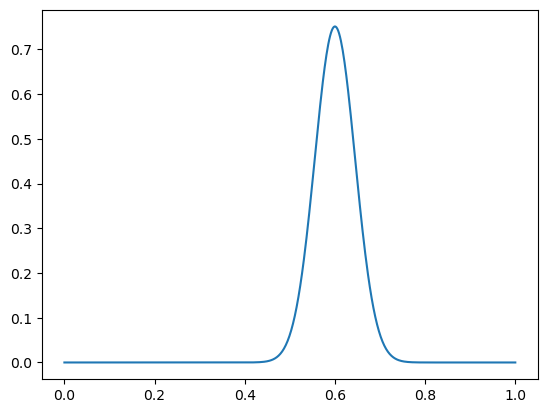

In [10]:
# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(0,1,500)
x0 = 0.6


psi_0 =psi(0,alpha, x, x0)

Integral = trapz(psi_0 ** 2,x)

print(Integral)

plt.plot(x, psi_0)

Create and fit Morse potential in atomic units

In [ ]:


# first compute and plot Morse potential
r_fit = np.linspace(0.95 * r_eq_au, 1.05 * r_eq_au, 100)
r_plot = np.linspace(0.75 * r_eq_au, 2 * r_eq_au, 100)
V_r_fit = De_au * (1 - np.exp(-beta_au * (r_fit - r_eq_au))) ** 2
V_r_plot = De_au * (1 - np.exp(-beta_au * (r_plot - r_eq_au))) ** 2

V_r_spline = interpolate.UnivariateSpline(r_fit, V_r_fit, k=5)


# now define the expansion coefficients to expand the Morse potential as a polynomial
# harmonic
k = 2 * De_au * beta_au ** 2
f_spline = V_r_spline.derivative()
k_spline = f_spline.derivative()
g_spline = k_spline.derivative()
h_spline = g_spline.derivative()

k_num = k_spline(r_eq_au)
print(k_num, k)
#assert np.isclose(k, k_num)
g_num = g_spline(r_eq_au)
h_num = h_spline(r_eq_au)

V_H = 1/2 * k_num * (r_plot -r_eq_au) ** 2

# cubic
g = -6 * De_au * beta_au ** 3
#assert np.isclose(g, g_num)

V_C = V_H + 1/6 * g_num * (r_plot - r_eq_au) ** 3

# quartic 
#h = 14 * De_SI * beta_SI ** 4

V_Q = V_C + 1/24 * h_num * (r_plot - r_eq_au) ** 4

print(k_num, g_num, h_num)
plt.plot(r_plot, V_r_plot, 'ro-')
plt.plot(r_plot, V_H, 'blue')
plt.plot(r_plot, V_C, 'green')
plt.plot(r_plot, V_Q, 'purple')
plt.xlim(0.75 * r_eq_au, 1.8 * r_eq_au)
plt.ylim(0, 0.4)
plt.show()

Now plot the potential and compute some eigenvalues

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate

# first compute and plot Morse potential
r = np.linspace(0.75 * r_eq_SI, 2.5 * r_eq_SI, 1000)
V_r = De_SI * (1 - np.exp(-beta_SI * (r - r_eq_SI))) ** 2

V_r_spline = interpolate.UnivariateSpline(r, V_r, k=5)


# now define the expansion coefficients to expand the Morse potential as a polynomial
# harmonic
k = 2 * De_SI * beta_SI ** 2
f_spline = V_r_spline.derivative()
k_spline = f_spline.derivative()
#g_spline = k_spline.derivative()
#h_spline = g_spline.derivative()

k_num = k_spline(r_eq_SI)
#g_num = g_spline(r_eq_SI)
#h_num = h_spline(r_eq_SI)

V_H = 1/2 * k_num * (r -r_eq_SI) ** 2

# cubic
#g = -6 * De_SI * beta_SI ** 3

#V_C = V_H + 1/6 * g_num * (r - r_eq_SI) ** 3

# quartic 
#h = 14 * De_SI * beta_SI ** 4

#V_Q = V_H + V_C + 1/24 * h_num * (r - r_eq_SI) ** 4


plt.plot(r, V_r, 'red')
plt.plot(r, V_r_spline(r), 'blue')
#plt.plot(r, V_C, 'green')
#plt.plot(r, V_Q, 'purple')
plt.xlim(0.75 * r_eq_SI, 1.5 * r_eq_SI)
#plt.ylim(0, 2e-18)
plt.show()

In [ ]:
# now compute fundamental and anharmonic correction
omega_SI = np.sqrt(2 * De_SI * beta_SI ** 2 / mu_SI)
xe_SI = hbar_SI * omega_SI / (4 * De_SI)

# compute and print fundamental energy in SI
E0 = hbar_SI * omega_SI * ((0 + 1/2) - xe_SI * (0 + 1/2) ** 2 )
E1 = hbar_SI * omega_SI * ((1 + 1/2) - xe_SI * (1 + 1/2) ** 2 )
fundamental_SI = E1-E0
print(fundamental_SI)
print(fundamental_SI * J_to_wn)


In [ ]:
B = h_SI / (8 * np.pi ** 2 * c_SI * mu_SI * r_eq_SI ** 2)

In [ ]:
print(B)